                                           TITANIC SURVIVAL PREDICTION

Importing the necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/LENOVO/Downloads/titanic/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Importing Seaborn for Data Visualization

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='Survived', ylabel='count'>

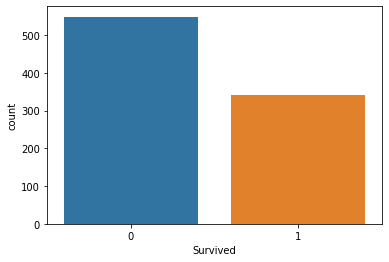

In [6]:
sns.countplot(data=df,x=df["Survived"])

<AxesSubplot:xlabel='Sex', ylabel='count'>

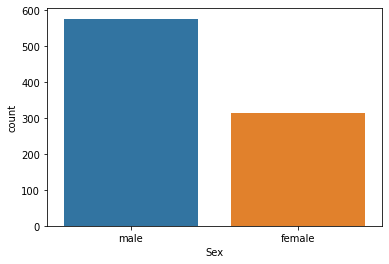

In [7]:
sns.countplot(data=df,x=df["Sex"])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

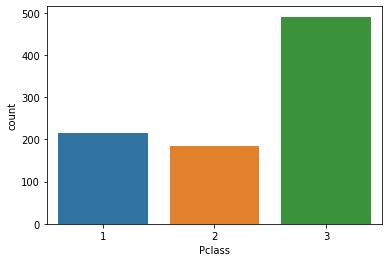

In [8]:
sns.countplot(data=df,x=df["Pclass"])

In [9]:
df["Survived"].corr(df["Fare"])

0.25730652238496227

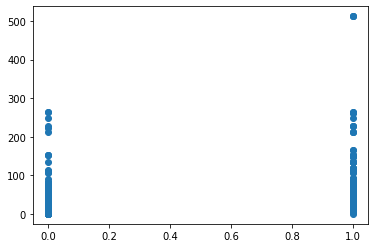

In [10]:
plt.scatter(x=df["Survived"],y=df["Fare"])

<AxesSubplot:xlabel='Sex', ylabel='count'>

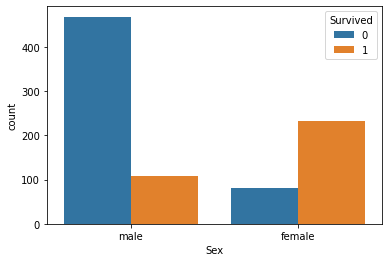

In [11]:
sns.countplot(x=df["Sex"],hue=df["Survived"],data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

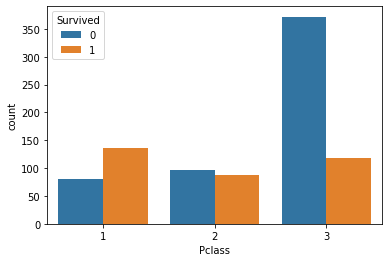

In [12]:
sns.countplot(x=df["Pclass"],hue=df["Survived"],data=df)

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[['Sex','Embarked']]= oe.fit_transform(df[['Sex','Embarked']])

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",1.0,54.0,0,0,17463,51.8625,E46,2.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0.0,4.0,1,1,PP 9549,16.7000,G6,2.0
11,12,1,1,"Bonnell, Miss. Elizabeth",0.0,58.0,0,0,113783,26.5500,C103,2.0


In [17]:
df=df.drop("Name",axis=1)
df=df.drop("Ticket",axis=1)
df=df.drop("Cabin",axis=1)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,0.0,38.0,1,0,71.2833,0.0
3,4,1,1,0.0,35.0,1,0,53.1000,2.0
6,7,0,1,1.0,54.0,0,0,51.8625,2.0
10,11,1,3,0.0,4.0,1,1,16.7000,2.0
11,12,1,1,0.0,58.0,0,0,26.5500,2.0


In [19]:
x=df[["Age","Pclass","Sex","Embarked"]]

In [20]:
y=df["Survived"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model=DecisionTreeClassifier()

In [25]:
model.fit(x_train,ytrain)
y_hat=model.predict(xtest)

In [26]:
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [27]:
from sklearn.metrics import classification_report

In [28]:
print("Classification report : \n",classification_report(ytest,y_hat))

Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.88      0.92      0.90        25

    accuracy                           0.86        37
   macro avg       0.85      0.83      0.84        37
weighted avg       0.86      0.86      0.86        37



In [49]:
print(model.score(xtest,ytest))
print(model.score(x_train,ytrain))

0.8648648648648649
0.952054794520548


In [30]:
df1=pd.read_csv("C:/Users/LENOVO/Downloads/titanic/test.csv")

In [31]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df1[['Sex','Embarked']]= oe.fit_transform(df1[['Sex','Embarked']])

In [33]:
df1.dropna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0.0,23.0,1,0,21228,82.2667,B45,2.0
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0.0,47.0,1,0,W.E.P. 5734,61.1750,E31,2.0
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0.0,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,0.0
26,918,1,"Ostby, Miss. Helene Ragnhild",0.0,22.0,0,1,113509,61.9792,B36,0.0
28,920,1,"Brady, Mr. John Bertram",1.0,41.0,0,0,113054,30.5000,A21,2.0
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",1.0,43.0,1,0,17765,27.7208,D40,0.0
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",1.0,20.0,0,0,SC/PARIS 2166,13.8625,D38,0.0
407,1299,1,"Widener, Mr. George Dunton",1.0,50.0,1,1,113503,211.5000,C80,0.0
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0.0,37.0,1,0,19928,90.0000,C78,1.0


In [34]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1.0,34.5,0,0,330911,7.8292,NaN,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0.0,47.0,1,0,363272,7.0000,NaN,2.0
2,894,2,"Myles, Mr. Thomas Francis",1.0,62.0,0,0,240276,9.6875,NaN,1.0
3,895,3,"Wirz, Mr. Albert",1.0,27.0,0,0,315154,8.6625,NaN,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.0,22.0,1,1,3101298,12.2875,NaN,2.0


In [54]:
xt=df1[["Age","Pclass","Sex","Embarked"]]
print(xt)


      Age  Pclass  Sex  Embarked
0    34.5       3  1.0       1.0
1    47.0       3  0.0       2.0
2    62.0       2  1.0       1.0
3    27.0       3  1.0       2.0
4    22.0       3  0.0       2.0
..    ...     ...  ...       ...
413   NaN       3  1.0       2.0
414  39.0       1  0.0       0.0
415  38.5       3  1.0       2.0
416   NaN       3  1.0       2.0
417   NaN       3  1.0       0.0

[418 rows x 4 columns]


In [55]:
xt.dropna()

,Age,Pclass,Sex,Embarked
0,34.5,3,1.0,1.0
1,47.0,3,0.0,2.0
2,62.0,2,1.0,1.0
3,27.0,3,1.0,2.0
4,22.0,3,0.0,2.0
...,...,...,...,...
409,3.0,3,0.0,2.0
411,37.0,1,0.0,1.0
412,28.0,3,0.0,2.0
414,39.0,1,0.0,0.0


In [57]:
yt=model.predict(xtest)

In [38]:
yt

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [59]:
xtest

,Age,Pclass,Sex,Embarked
581,39.0,1,0.0,0.0
21,34.0,2,1.0,2.0
486,35.0,1,0.0,2.0
66,29.0,2,0.0,2.0
520,30.0,1,0.0,2.0
310,24.0,1,0.0,0.0
325,36.0,1,0.0,0.0
641,24.0,1,0.0,0.0
782,29.0,1,1.0,2.0
248,37.0,1,1.0,2.0


In [60]:
xt

,Age,Pclass,Sex,Embarked
0,34.5,3,1.0,1.0
1,47.0,3,0.0,2.0
2,62.0,2,1.0,1.0
3,27.0,3,1.0,2.0
4,22.0,3,0.0,2.0
...,...,...,...,...
413,NaN,3,1.0,2.0
414,39.0,1,0.0,0.0
415,38.5,3,1.0,2.0
416,NaN,3,1.0,2.0


In [61]:
xt.isna().sum()

Age         86
Pclass       0
Sex          0
Embarked     0
dtype: int64

In [62]:
xtt=xt.fillna(32)

In [63]:
yfinal=model.predict(xtt)

In [64]:
yfinal

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,

In [65]:
yfinal.shape

(418,)

In [66]:
df1.insert(2,column="Survived",value=yfinal)

In [67]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,0.0,38.0,1,0,71.2833,0.0
3,4,1,1,0.0,35.0,1,0,53.1000,2.0
6,7,0,1,1.0,54.0,0,0,51.8625,2.0
10,11,1,3,0.0,4.0,1,1,16.7000,2.0
11,12,1,1,0.0,58.0,0,0,26.5500,2.0


In [138]:
df1.head()

,PassengerId,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,"Kelly, Mr. James",1.0,34.5,0,0,330911,7.8292,NaN,1.0
1,893,3,0,"Wilkes, Mrs. James (Ellen Needs)",0.0,47.0,1,0,363272,7.0000,NaN,2.0
2,894,2,0,"Myles, Mr. Thomas Francis",1.0,62.0,0,0,240276,9.6875,NaN,1.0
3,895,3,1,"Wirz, Mr. Albert",1.0,27.0,0,0,315154,8.6625,NaN,2.0
4,896,3,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.0,22.0,1,1,3101298,12.2875,NaN,2.0


In [68]:
csv_data=df1.to_csv("C:/Users/LENOVO/Downloads/titanic/Submission.csv")

In [70]:
csv_data

In [71]:
print(csv_data)

None


In [72]:
da=pd.read_csv("C:/Users/LENOVO/Downloads/titanic/Submission.csv")

In [73]:
da.head()

,Unnamed: 0,PassengerId,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,892,3,1,"Kelly, Mr. James",1.0,34.5,0,0,330911,7.8292,NaN,1.0
1,1,893,3,0,"Wilkes, Mrs. James (Ellen Needs)",0.0,47.0,1,0,363272,7.0000,NaN,2.0
2,2,894,2,0,"Myles, Mr. Thomas Francis",1.0,62.0,0,0,240276,9.6875,NaN,1.0
3,3,895,3,1,"Wirz, Mr. Albert",1.0,27.0,0,0,315154,8.6625,NaN,2.0
4,4,896,3,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.0,22.0,1,1,3101298,12.2875,NaN,2.0
